# Desafio Módulo 2 - Bootcamp Alura Data Science Aplicada 2

## Análise do programa nacional de imunização - Vacina BCG

![](https://federacaors.org.br/wp-content/uploads/2019/09/vacina-argumento-pais-contra-600x400.jpg)

## Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

# Introdução

Para o segundo projeto do Bootcamp de Data Science Aplicada 2, que durante o Módulo 02 foi abordado métodos de tratamento, exploração dos dados e escolha de cores para melhor visualização dos dados, foi proposto como desafio final a análise de dados do programa de imunização nacional ([link](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)).

Para análise foi escolhida as doses aplicadas da vacina BCG que tem como publico-alvo todas as crianças com até um ano de idade.

## A vacina BCG

![](http://lillo.com.br/wp-content/uploads/2018/08/20180723_artigo_v2.png)

Possivelmente a vacina mais conhecida por nós brasileiros, pois é ela a responsável pela famosa marca que a grande maioria carrega no braço.

Cridada no dia 01 de julho de 1921 por Léon Calmette e Alphonse Guérin, médicos que deram o nome à vacina BCG (Bacilo de Calmette e Guérin), protege contra as formas mais grave da doença que tanto preocupava o mundo, a tuberculose, que por ser uma doença bacteriana, extremamente contagiosa e que não possui tratamento era responsável por milhares de mortes todos os anos no mundo.

## Programa nacional de vacinação de BCG

Sendo obrigatória no Brasil, a meta extipulada pelo ministério da saúde é de vacinar todas as crianças, de preferência o mais próximo possível ao nascimento, porém, crianças de até quatro anos ainda podem tomar a vacina. 

Nos anos de 2017 e 2018 a BCG, vacina que previne a tuberculose foi a única a atingir a meta anual de cobertura vacinal com cobertura de 96,41% em 2017 e 96,09% em 2018. [[1]](https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/)

# Objetivos

Analisar as doses de vacinas aplicadas durante o período entre 2000 e 2018, separando os dados por região e por estados;

Proporção do número de doses com a população nascida nos anos em questão;

Observar a quantidade de doses ano após ano e comparar com a quantidade de nascimentos durante o mesmo período.


# Análises
- Número de doses;
- Número de nascidos vivos;
- Comparação do número de doses aplicadas com o número de nascimentos no período.


# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import seaborn as sns
import warnings
import datetime
from datetime import datetime, date

sns.set_style("darkgrid")

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format


# Definindo funções


In [3]:
def coluna_regiao(data):
    """    
    
    Parâmetros: DataFrame

    Descrição: Recebe um dataframe obtido do Tabnet, identifica a coluna 'Unidade da Federação' e pelo número que vem antes do estado e cria uma nova coluna com a região em que o estado se localiza, também remove o número e retorna a coluna atualizada somente com o número do estado

    """

    # https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python

    # Separando o número da ciadade da coluna "Unidade da Federação" pelo caraceter de espaço entre o número e o estado.
    a = data['Unidade da Federação'].str.split(' ', 1, expand = True)
    #df.insert(value = a[0], column = 'Número do Estado', loc = 0)
    # Guardando o número separado
    c = a[0]

    # Substituindo pelo estado sem o número antes do nome
    data['Unidade da Federação'] = a[1]

    # Criando uma coluna com o primeiro caracter de cada uma das linhas da coluna 'Número do Estado'
    a = c.str[:1]

    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Sul','5':'Centro Oeste'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

    # Utilizando a coluna de estados como Index
    data = data.set_index('Unidade da Federação')
    return data

In [4]:
def lineplot(data,x,y,hue, titulo, x_label, y_label):
    """
    
    Parâmetros: data, x, y, hue, titulo, x_label, y_label

    Descrição: Plot de um gráfico de linhas que já organiza na melhor distribuição da paleta de cores
    
    """

    # Entradas
    plt.figure(figsize = (16,9))
    ax = sns.lineplot(
        data = data, 
        x = x , 
        y = y, 
        hue = hue, 
        palette= sns.color_palette('rocket_r', len(plot[hue].unique()))
        )
    
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} M"))

    # Legenda e label    
    ax.set_title(titulo, fontsize = 20)  
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)


    plt.show()

In [5]:
def plot_last_year(data,ylabel,title, palette):

    """

    Entradas: data,ylabel,title, palette

    Descrição: inputar o dataframe, o ylabel desejado, título e paleta de cores desejada

    """
    
    last_year = data.columns[-1]
    df_plot = data.sort_values(by=last_year,ascending=False)

    plt.figure(figsize=(14,9))
    ax = sns.barplot(
        data = df_plot,
        x = df_plot.index,
        y = last_year,
        palette= sns.color_palette(palette, len(df_plot.index.unique()))        
    )


    ax.set_xlabel('')
    ax.set_ylabel(ylabel)    
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 70)
    plt.legend('')
    plt.show()

In [6]:
def relacao_regiao(data, titulo):
    """

    Parâmetros: data, titulo

    Definição: Recebe um dataframe, faz o melt para o snslineplot e configura o plot com os parâmetros padronizados só mudando o título

    """

    # Criando o novo DataFrame
    plot = data
    plot = plot.T
    plot.index.name = 'data'
    plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

    # Inputs para o gráfico
    data = plot
    x = 'data'
    y = 'value'
    hue = 'Unidade da Federação' 
    title = titulo
    x_label = ''
    y_label = ''

    # Configuração do gráfico
    plt.figure(figsize = (16,9))
    ax = sns.lineplot(
        data = data,
        x = x , 
        y = y, 
        hue = hue,
        style = hue,
        palette= sns.color_palette('tab10', len(plot[hue].unique()))    

        )
 
    # Legenda e label    
    ax.set_title(title, fontsize = 20)  
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.hlines(y = 1, xmin= plot['data'].min(), xmax = plot['data'].max(), linestyles= '--', color= 'grey', alpha = 0.4)  
    plt.show()

# Importação dos dados

Os dados foram obtidos do datasus, foram dados dados das doses da vacina [[2]](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) e também do número de nascimentos [[3]](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinasc/cnv/nvuf.def) por ano, no período entre 2000 e 2018

In [7]:
df_bcg = pd.read_csv(r'./dados/doses_bcg.csv',encoding= 'ISO-8859-1', sep=';', skiprows=4, skipfooter=20,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_bcg = df_bcg.drop('Total', axis = 1)

# Limpando a coluna 'Unidade da Federação'
df_bcg = coluna_regiao(df_bcg)

# Separando o dataframe por Região
bcg_regiao = df_bcg.groupby('Região').sum()

# Salvando o dataframe por Estados
bcg_estados = df_bcg.drop(columns='Região')

In [8]:
df_born = pd.read_csv(r'./dados/nascimentos_tabnet.csv',encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=13,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_born = df_born.drop('Total',axis = 1)

# Limpando a coluna 'Unidade da Federação'
df_born = coluna_regiao(df_born)

# Separando o dataframe por Região
born_regiao = df_born.groupby('Região').sum()

# Salvando o dataframe por Estados
born_estados = df_born.drop(columns='Região')

# Análise por Região

## Nascimentos por região

In [9]:
born_regiao.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Região,,,,,,,,,,,,,,,,,,,
Centro Oeste,233101,227821,227674,226339,229798,231431,221781,215471,222876,220210,220851,226737,230393,234674,245199,247614,234860,244096,246036
Nordeste,926007,942887,930010,930289,910902,925577,887330,878679,888418,865318,841386,851181,833013,821903,833592,847082,796766,818068,837591
Norte,291049,299005,300866,311128,309039,314514,317265,311458,321551,310254,305865,313029,307430,312378,320674,319770,306530,311509,318030
Sudeste,1305543,1229832,1194795,1180917,1178817,1171738,1139525,1122863,1130501,1119455,1123910,1144213,1153422,1148317,1183689,1196970,1128096,1152539,1147601
Sul,451061,415929,406057,389578,397992,391834,379027,362857,371482,366344,369856,378000,381531,386755,396105,406232,391548,397323,395674


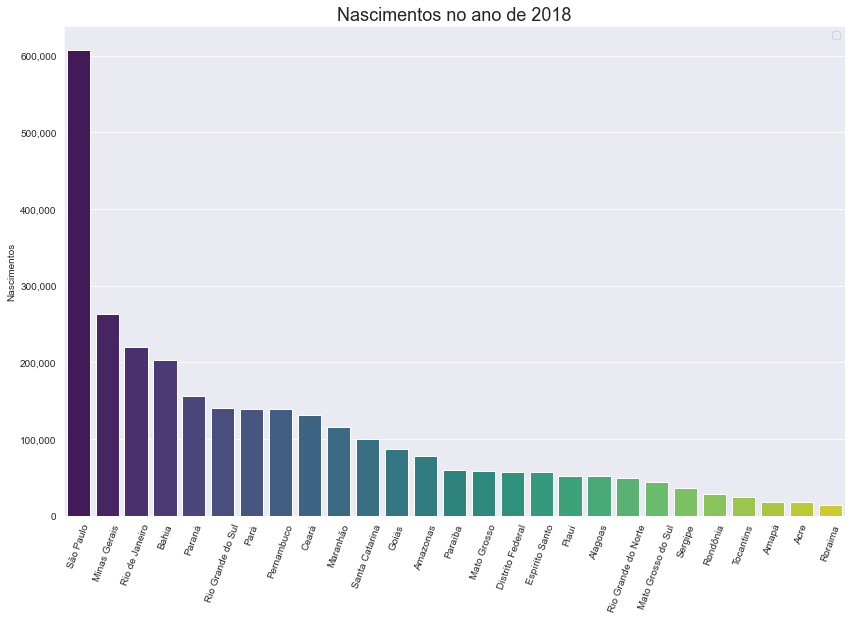

In [10]:
plot_last_year(born_estados, 'Nascimentos', 'Nascimentos no ano de '+born_estados.columns[-1], 'viridis')

In [11]:
plot = born_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

# dividindo por 1 Milhão para melhorar a visualização
plot['value'] = plot['value']/1e6

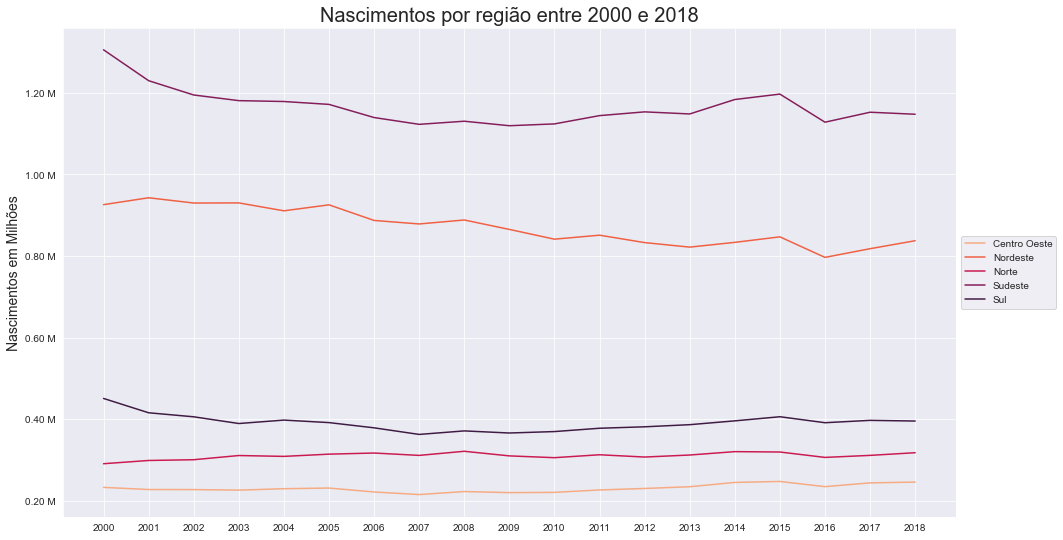

In [12]:
lineplot(plot, 'data', 'value', 'Região', 'Nascimentos por região entre 2000 e 2018', '', 'Nascimentos em Milhões')

Observamos que o número de nascimentos se manteve estável para os 18 anos que analisamos, sendo a região Sudeste sempre demonstrando o maior número de nascidos por ano.

## Vacinas BCG por região

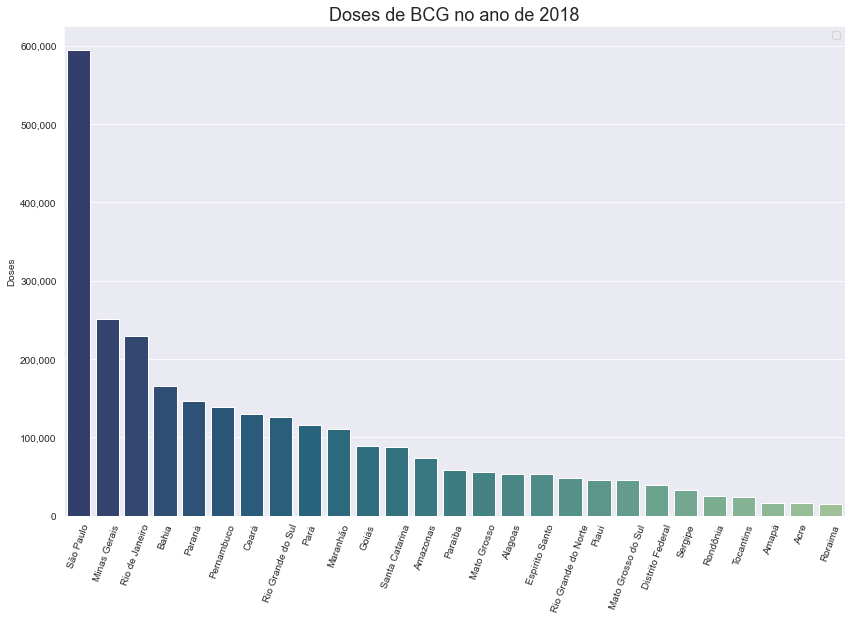

In [13]:
plot_last_year(bcg_estados, 'Doses', 'Doses de BCG no ano de '+bcg_estados.columns[-1], 'crest_r')

In [14]:
plot = bcg_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

# dividindo por 1 Milhão para melhorar a visualização
plot['value'] = plot['value']/1e6

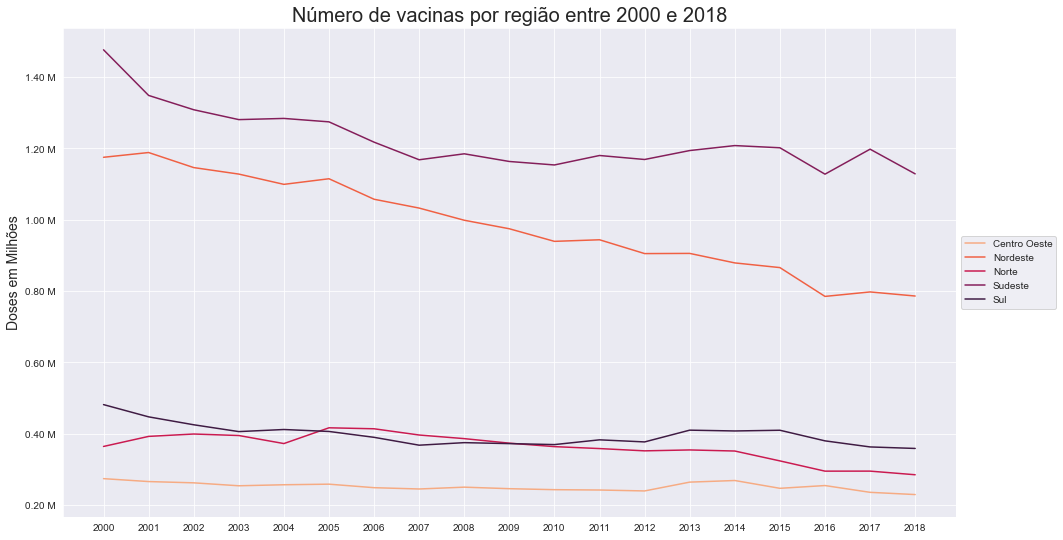

In [15]:
lineplot(plot, 'data', 'value', 'Região', 'Número de vacinas por região entre 2000 e 2018', '', 'Doses em Milhões')

Nos estados das regiões Centro Oeste, Norte e Sul a vacinação se manteve constante, porém quando analisamos as regiões Sudeste e Nordeste percebemos uma queda considerável no número de vacinados, o que é preocupante, pois como visto anteriormente, o número de nascimentos, ao contrário do número de vacinados, não diminiu na mesma proporção.

# Relação entre doses de BCG e nascimentos

Será analisada a relação entre o número de doses de vacina com o número de nascimentos ano após ano no período entre 2000 e 2018

In [16]:
plot = bcg_regiao/born_regiao
plot = plot.T
plot.index.name = 'data'
plot = plot.reset_index().melt(id_vars= 'data', value_vars= plot.columns)

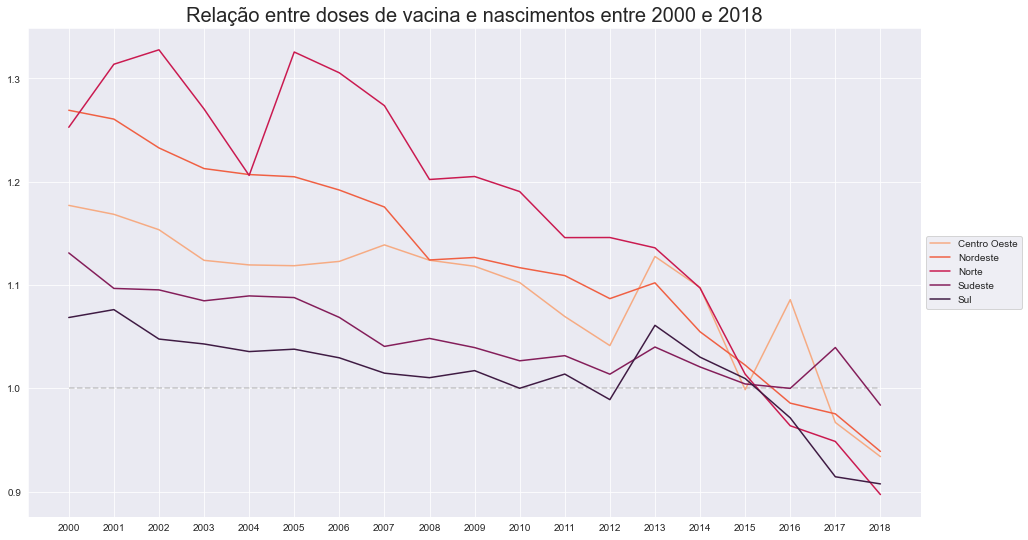

In [17]:
data = plot
x = 'data'
y = 'value'
hue = 'Região'
title = 'Relação entre doses de vacina e nascimentos entre 2000 e 2018'
x_label = ''
y_label = ''

plt.figure(figsize = (16,9))
ax = sns.lineplot(
    data = data,
    x = x , 
    y = y, 
    hue = hue, 
    palette= sns.color_palette('rocket_r', len(plot[hue].unique()))
    )
    
# Legenda e label    
ax.set_title(title, fontsize = 20)  
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(x_label, fontsize= 14)
ax.set_ylabel(y_label, fontsize = 14)
ax.hlines(y = 1, xmin= plot['data'].min(), xmax = plot['data'].max(), linestyles= '--', color= 'grey', alpha = 0.4)  

plt.show()

No primeiro momento era bastante comum a relação ser maior que um, pois como dito logo na Introdução, a vacina pode ser tomada por crianças de até 4 anos, então é normal que as crianças que não foram vacinadas no parto receberem a dose em outro momento, o que é interessante, já que mostra como a relação entre o número de vainas e o número de partos é maior do que se imaginava no primeiro momento.

Infelizmente, também é fácil notar como essa relação diminuiu com o passar do tempo. No ano de 2015 se tornou cada vez mais próxima de 1 e parar piorar nos anos que se passaram grande parte das regiões manteve a relação menor que 1.

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.209712,1.202456,1.173992,1.141543,1.126483,1.142708,1.143411,1.121878,1.087302,1.090650,1.079667,1.064550,1.050617,1.074714,1.046216,1.015804,1.015046,0.974782,0.946180
std,0.184804,0.172519,0.122606,0.107538,0.101479,0.123564,0.121710,0.128584,0.115670,0.105457,0.108862,0.115399,0.098620,0.090030,0.088623,0.118153,0.086667,0.113942,0.087536
min,1.030266,1.041341,0.963466,0.948739,0.945547,0.897673,0.892339,0.873246,0.880939,0.904552,0.902401,0.773724,0.830526,0.861628,0.838191,0.583969,0.808927,0.684493,0.682444
25%,1.104505,1.089338,1.094556,1.063803,1.054035,1.054345,1.046505,1.024690,1.019850,1.024059,1.014907,1.000105,1.004848,1.031931,0.999784,0.993695,0.968021,0.923509,0.904645
50%,1.194685,1.201884,1.172681,1.109259,1.105235,1.103680,1.137017,1.107021,1.057224,1.068222,1.065427,1.036882,1.024480,1.066087,1.042904,1.023295,1.015707,0.972262,0.955449
75%,1.243741,1.238315,1.235544,1.197915,1.201879,1.211264,1.194950,1.161686,1.115467,1.115744,1.127800,1.117430,1.109287,1.125246,1.084514,1.069268,1.089237,1.045508,0.993721
max,1.882577,1.787415,1.485820,1.376417,1.326222,1.478739,1.413022,1.445673,1.367896,1.352741,1.343203,1.349126,1.237177,1.269432,1.257135,1.255193,1.146919,1.202492,1.136913


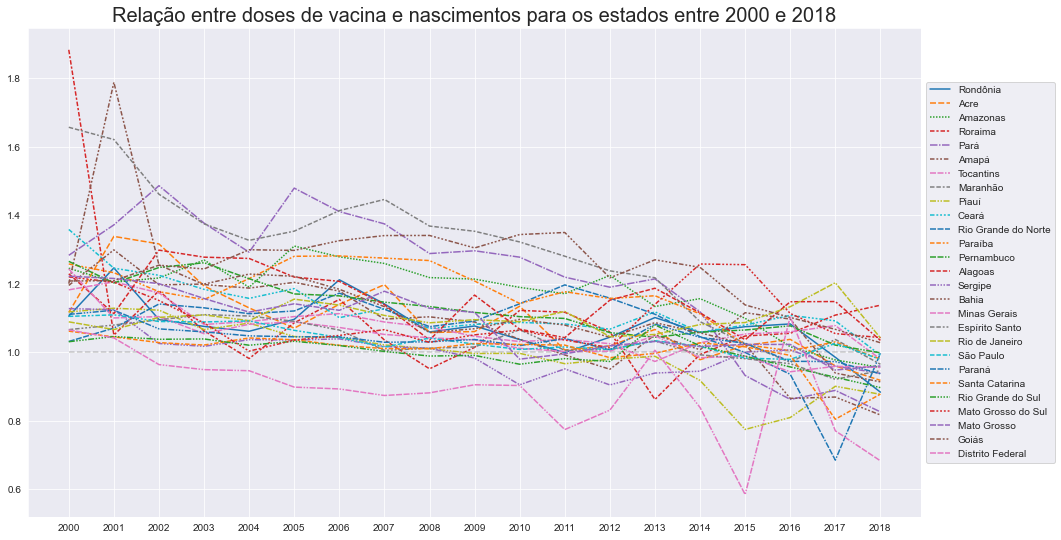

In [18]:
relacao = (df_bcg.drop(columns = 'Região')/df_born.drop(columns = 'Região'))
display(relacao.describe())
relacao_regiao(relacao, 'Relação entre doses de vacina e nascimentos para os estados entre 2000 e 2018' ) 

Fica muito claro que a relação entre número de vacinados e a quantidade de nascimentos tem diminuido e nos últimos anos para a praticamente todos os estados, porém, a situação tem se agravado cada vez mais nos últimos anos, pois cada vez mais as crianças que nascem estão saindo da maternidade sem uma vacina que se faz extremamente importante para controlar uma doença que é tão devastadora.



## Relação entre doses de vacina e nascimentos para o ano de 2018

In [19]:
print('Média de Vacinas divido pelo número de nascimentos')
display((df_bcg[df_bcg.columns[-1]]/df_born[df_born.columns[-1]]).sort_values().mean())
display((df_bcg[df_bcg.columns[-1]]/df_born[df_born.columns[-1]]).sort_values())

Média de Vacinas divido pelo número de nascimentos


0.9461796542869487

Unidade da Federação
Distrito Federal       0.682444
Bahia                  0.816294
Pará                   0.825454
Piauí                  0.876703
Santa Catarina         0.877247
Rondônia               0.882960
Rio Grande do Sul      0.896217
Amapá                  0.913073
Acre                   0.917458
Paraná                 0.936599
Sergipe                0.937893
Espírito Santo         0.945631
Amazonas               0.955142
Minas Gerais           0.955449
Mato Grosso            0.959572
Maranhão               0.964431
São Paulo              0.978554
Paraíba                0.979315
Tocantins              0.979432
Ceará                  0.990999
Rio Grande do Norte    0.996443
Pernambuco             0.997828
Goiás                  1.027305
Alagoas                1.034151
Rio de Janeiro         1.041049
Mato Grosso do Sul     1.042292
Roraima                1.136913
Name: 2018, dtype: float64

Podemos observar que no ano de 2018 apenas 5 estados apresentaram mais doses de vacinas que o número de nascimentos, o que provavelmente está relacionado à capacidade do estado em vacinar as crianças de até 4 anos que não tomaram a vacina ao nascer.

No geral, a relação entre doses de vacina e nascimentos ficou a cima dos 90%, sendo a média 94,62%, o que mostra um bom resultado, já que podemos considerar que parte das crianças que nasceram no ano de 2018 tomaram corretamente a vacina BCG, mas tendo visto que esse número já foi muito maior é um dado preocupante e que deve ser ligado o sinal de alerta.

## Análise da relação entre doses e nascimentos em cada região


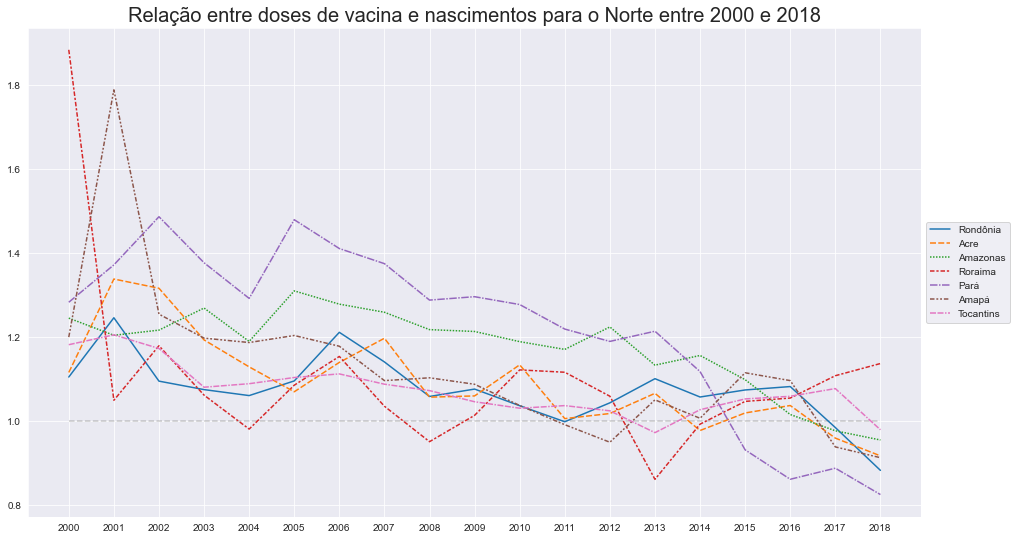

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.287405,1.314416,1.245590,1.178968,1.132527,1.192310,1.211848,1.170024,1.106776,1.113188,1.118017,1.076902,1.072624,1.056925,1.047928,1.048322,1.029563,0.990515,0.944348
std,0.270113,0.233276,0.126468,0.116771,0.101266,0.152528,0.102796,0.116556,0.111940,0.102111,0.092540,0.091738,0.098256,0.113773,0.066773,0.060660,0.078649,0.077098,0.098348
min,1.104827,1.049619,1.095043,1.061793,0.981097,1.069762,1.112226,1.035383,0.951149,1.013745,1.030695,0.991496,0.949824,0.861628,0.977698,0.931695,0.861821,0.888141,0.825454
25%,1.148667,1.204537,1.175929,1.077767,1.074828,1.090449,1.146681,1.092048,1.057799,1.052987,1.036906,1.002252,1.021270,1.011598,0.999784,1.033149,1.026405,0.949170,0.898017
50%,1.199699,1.245684,1.216315,1.193021,1.128971,1.103680,1.178007,1.140696,1.072548,1.076186,1.121761,1.036882,1.043475,1.066087,1.027107,1.052745,1.054832,0.977038,0.917458
75%,1.263699,1.354559,1.285046,1.233006,1.188120,1.256546,1.244556,1.227846,1.160235,1.150339,1.161373,1.143327,1.124332,1.116950,1.087543,1.086304,1.070581,1.031073,0.967287
max,1.882577,1.787415,1.485820,1.376417,1.291726,1.478739,1.410225,1.374304,1.287667,1.295734,1.277103,1.218780,1.223862,1.213661,1.156036,1.114912,1.096320,1.107942,1.136913


In [22]:
norte_teste = (df_bcg.query("Região == 'Norte'").drop(columns = 'Região')/df_born.query("Região == 'Norte'").drop(columns = 'Região'))
relacao_regiao(norte_teste,'Relação entre doses de vacina e nascimentos para o Norte entre 2000 e 2018' ) 
display(norte_teste.describe())

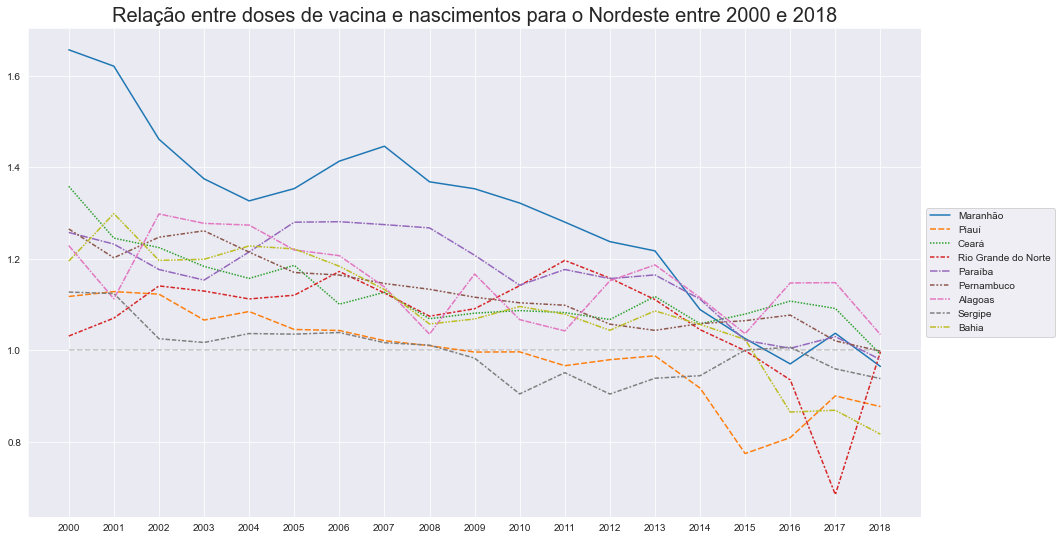

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.248323,1.225716,1.210001,1.184333,1.182892,1.180938,1.177979,1.158355,1.113806,1.117836,1.095259,1.096717,1.083697,1.094582,1.043669,1.002506,0.991126,0.970903,0.954895
std,0.180723,0.165533,0.122601,0.110072,0.093291,0.103682,0.117542,0.131560,0.123914,0.113641,0.113267,0.107021,0.102885,0.091862,0.069029,0.089635,0.110792,0.138544,0.068424
min,1.030948,1.070093,1.025006,1.016819,1.036312,1.035035,1.038560,1.016387,1.009899,0.982624,0.904378,0.950915,0.904118,0.938712,0.917177,0.774132,0.808927,0.684493,0.816294
25%,1.126947,1.123760,1.140393,1.129164,1.111974,1.120037,1.100485,1.124969,1.035046,1.068222,1.066727,1.042142,1.043497,1.043243,1.044824,1.000138,0.935133,0.900092,0.937893
50%,1.228514,1.201884,1.196295,1.183052,1.214321,1.185369,1.171988,1.132539,1.068744,1.090525,1.095438,1.082115,1.066942,1.110500,1.057635,1.023295,1.004092,1.020299,0.979315
75%,1.264871,1.244853,1.246881,1.260833,1.227788,1.221255,1.206529,1.145749,1.133045,1.166435,1.140967,1.176270,1.156393,1.164458,1.088645,1.035983,1.076632,1.036933,0.996443
max,1.656369,1.620555,1.460876,1.374427,1.326222,1.353073,1.413022,1.445673,1.367896,1.352741,1.321508,1.279903,1.237177,1.216986,1.114565,1.078857,1.146919,1.147576,1.034151


In [23]:
nordeste_teste = (df_bcg.query("Região == 'Nordeste'").drop(columns = 'Região')/df_born.query("Região == 'Nordeste'").drop(columns = 'Região'))
relacao_regiao(nordeste_teste,'Relação entre doses de vacina e nascimentos para o Nordeste entre 2000 e 2018' ) 
nordeste_teste.describe()

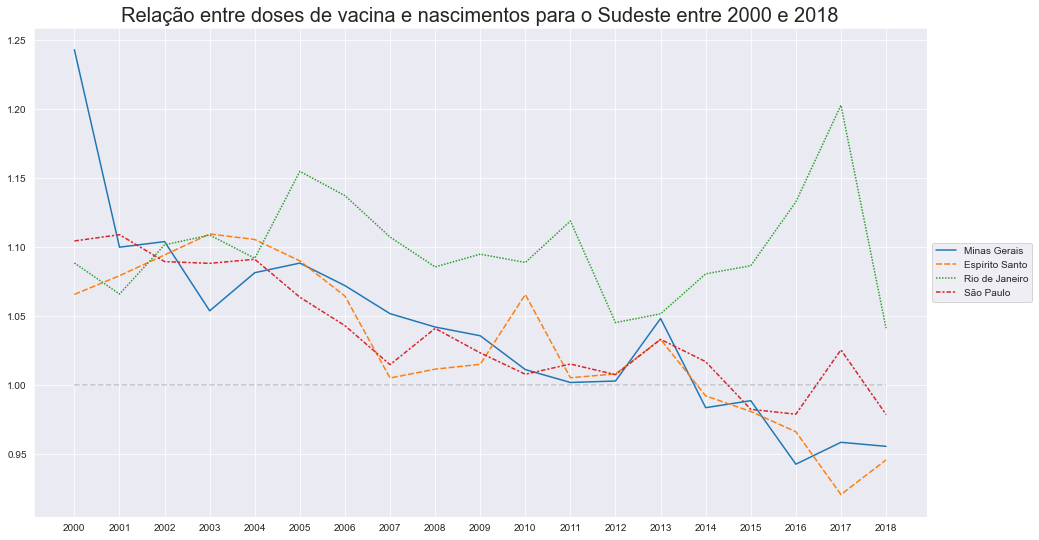

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.125146,1.088286,1.097091,1.089829,1.092263,1.098982,1.078984,1.044519,1.044868,1.042041,1.043185,1.035136,1.015760,1.041335,1.018140,1.009440,1.004944,1.026675,0.980170
std,0.079917,0.019508,0.006654,0.026088,0.009877,0.038969,0.040592,0.046255,0.030503,0.036078,0.040224,0.055977,0.019669,0.009809,0.043835,0.051325,0.086351,0.124963,0.042868
min,1.065506,1.065742,1.089235,1.053592,1.081207,1.063442,1.042827,1.004934,1.011340,1.014858,1.007666,1.001694,1.002746,1.032901,0.983444,0.980709,0.942529,0.920523,0.945631
25%,1.082573,1.075692,1.092860,1.079388,1.088499,1.081982,1.058895,1.012174,1.033496,1.021065,1.010191,1.004267,1.006201,1.032935,0.989842,0.981878,0.960142,0.948907,0.952994
50%,1.096222,1.089338,1.097711,1.098232,1.091304,1.088956,1.068046,1.033061,1.041370,1.029335,1.038229,1.010089,1.007618,1.040506,1.004366,0.985394,0.972373,0.991843,0.967001
75%,1.138795,1.101932,1.101941,1.108672,1.095068,1.105956,1.088135,1.065406,1.052742,1.050311,1.071224,1.040958,1.017176,1.048906,1.032665,1.012956,1.017174,1.069612,0.994177
max,1.242634,1.108726,1.103710,1.109259,1.105235,1.154573,1.137017,1.107021,1.085392,1.094636,1.088615,1.118670,1.045060,1.051428,1.080383,1.086261,1.132502,1.202492,1.041049


In [24]:
sudeste_teste = (df_bcg.query("Região == 'Sudeste'").drop(columns = 'Região')/df_born.query("Região == 'Sudeste'").drop(columns = 'Região'))
relacao_regiao(sudeste_teste,'Relação entre doses de vacina e nascimentos para o Sudeste entre 2000 e 2018' ) 
display(sudeste_teste.describe())

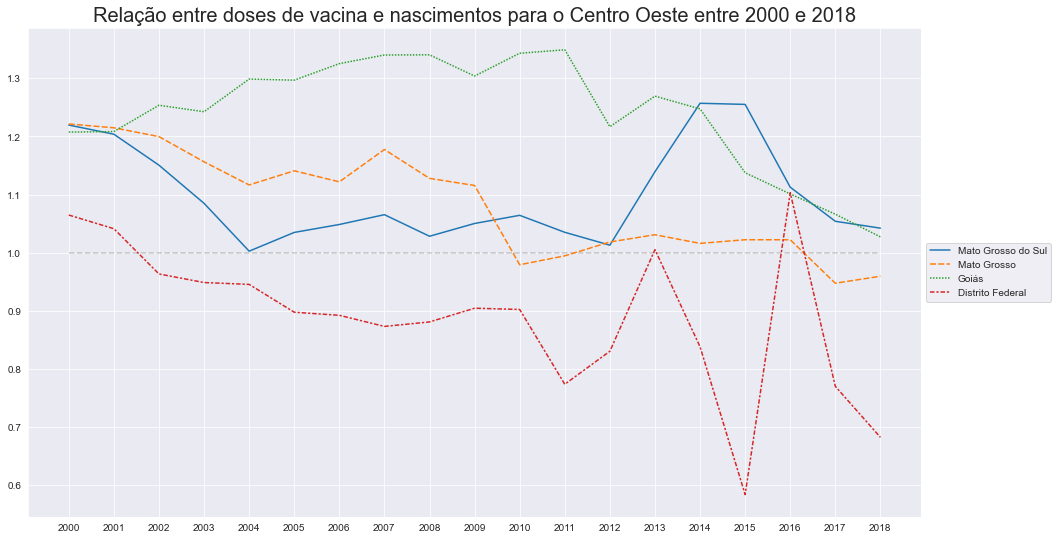

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.178400,1.167182,1.141902,1.108176,1.090928,1.092616,1.097042,1.114140,1.094435,1.093651,1.072320,1.038170,1.019720,1.111268,1.089713,0.999786,1.084852,0.959510,0.927903
std,0.075949,0.084016,0.126191,0.124298,0.155770,0.168713,0.179793,0.196245,0.192883,0.165705,0.192322,0.237014,0.157793,0.120403,0.201322,0.293053,0.042013,0.137069,0.167550
min,1.064856,1.041341,0.963466,0.948739,0.945547,0.897673,0.892339,0.873246,0.880939,0.904552,0.902401,0.773724,0.830526,1.005278,0.838191,0.583969,1.022288,0.770114,0.682444
25%,1.171887,1.163269,1.103827,1.050930,0.988417,1.000625,1.009527,1.017422,0.991504,1.013883,0.960085,0.939429,0.967392,1.024540,0.971612,0.912776,1.081402,0.903181,0.890290
50%,1.213616,1.206214,1.175204,1.120683,1.059680,1.087954,1.085261,1.121552,1.078157,1.083019,1.021838,1.014914,1.015759,1.085181,1.131763,1.079990,1.102190,1.000810,0.993439
75%,1.220129,1.210127,1.213279,1.177928,1.162190,1.179945,1.172776,1.218270,1.181087,1.162787,1.134074,1.113654,1.068087,1.171909,1.249863,1.167000,1.105640,1.057139,1.031052
max,1.221514,1.214956,1.253732,1.242598,1.298805,1.296885,1.325309,1.340211,1.340487,1.304014,1.343203,1.349126,1.216836,1.269432,1.257135,1.255193,1.112738,1.066307,1.042292


In [25]:
centro_teste = (df_bcg.query("Região == 'Centro Oeste'").drop(columns = 'Região')/df_born.query("Região == 'Centro Oeste'").drop(columns = 'Região'))
relacao_regiao(centro_teste,'Relação entre doses de vacina e nascimentos para o Centro Oeste entre 2000 e 2018' ) 
display(centro_teste.describe())

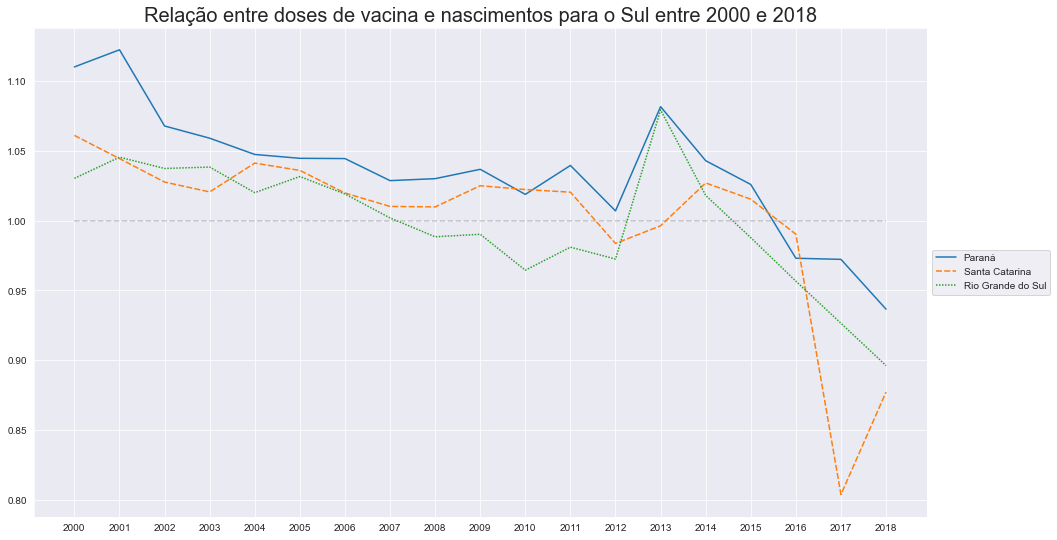

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.067097,1.070698,1.044227,1.039292,1.036181,1.037372,1.027748,1.013564,1.009420,1.017312,1.001842,1.013621,0.987703,1.052384,1.029300,1.009669,0.973327,0.900877,0.903354
std,0.040232,0.044683,0.020932,0.019253,0.014327,0.006634,0.014443,0.013683,0.020807,0.024188,0.032375,0.029833,0.017573,0.048583,0.012606,0.019660,0.016800,0.087067,0.030313
min,1.030266,1.044400,1.027610,1.020535,1.020030,1.031568,1.019071,1.001909,0.988423,0.990219,0.964512,0.980989,0.972515,0.996301,1.018015,0.987798,0.956662,0.803875,0.877247
25%,1.045630,1.044902,1.032473,1.029436,1.030593,1.033756,1.019412,1.006031,0.999114,1.007601,0.991647,1.000683,0.978079,1.037782,1.022498,1.001567,0.964861,0.865184,0.886732
50%,1.060993,1.045404,1.037336,1.038336,1.041157,1.035944,1.019753,1.010153,1.009804,1.024983,1.018782,1.020376,0.983643,1.079263,1.026982,1.015337,0.973059,0.926494,0.896217
75%,1.085513,1.083847,1.052536,1.048671,1.044257,1.040274,1.032087,1.019391,1.019918,1.030859,1.020508,1.029937,0.995297,1.080425,1.034943,1.020604,0.981659,0.949378,0.916408
max,1.110032,1.122291,1.067736,1.059006,1.047357,1.044604,1.044421,1.028630,1.030032,1.036734,1.022233,1.039497,1.006951,1.081587,1.042904,1.025872,0.990258,0.972262,0.936599


In [26]:
sul_teste = (df_bcg.query("Região == 'Sul'").drop(columns = 'Região')/df_born.query("Região == 'Sul'").drop(columns = 'Região'))
relacao_regiao(sul_teste,'Relação entre doses de vacina e nascimentos para o Sul entre 2000 e 2018' ) 
display(sul_teste.describe())

In [32]:
(bcg_regiao/born_regiao).sort_values(by = '2018')

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Região,,,,,,,,,,,,,,,,,,,
Norte,1.252720,1.313761,1.327747,1.270413,1.206084,1.325598,1.305467,1.273665,1.202167,1.205055,1.190466,1.145881,1.145968,1.135976,1.097064,1.013679,0.963694,0.948483,0.897066
Sul,1.068503,1.076152,1.047646,1.042885,1.035523,1.037840,1.029486,1.014631,1.010243,1.017069,0.999992,1.013743,0.988989,1.060943,1.030141,1.009435,0.971329,0.914299,0.907396
Centro Oeste,1.177095,1.168444,1.153513,1.123881,1.119431,1.118666,1.122851,1.138826,1.123975,1.118124,1.102359,1.069486,1.041312,1.127603,1.097639,0.998603,1.085800,0.966894,0.933806
Nordeste,1.269211,1.260637,1.232728,1.212746,1.206947,1.204800,1.191952,1.175527,1.124244,1.126654,1.116750,1.109113,1.086804,1.102097,1.054697,1.022405,0.985590,0.975240,0.938835
Sudeste,1.131061,1.096682,1.095260,1.084682,1.089431,1.087819,1.068612,1.040524,1.048260,1.039392,1.026597,1.031561,1.013626,1.039950,1.020644,1.004191,0.999892,1.039470,0.983648


Podemos observar que os piores resultados foram obtidos pelas regiões Norte com 0,897 seguido pela região Sul com 0,907, as regiões Centro Oeste e Nordeste apresentaram valores próximos com 0,934 e 0,939 respectivamente. Sendo a região Sudeste, a que se manteve mais próxima de 1 no ano de 2018.

In [33]:
(bcg_regiao/born_regiao).sort_values(by = '2018').describe()

data,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.179718,1.183135,1.171379,1.146921,1.131483,1.154945,1.143674,1.128635,1.101778,1.101259,1.087233,1.073957,1.055340,1.093314,1.060037,1.009662,1.001261,0.968877,0.932151
std,0.083788,0.102719,0.111398,0.093289,0.074803,0.113075,0.109104,0.104996,0.074696,0.075197,0.075903,0.054434,0.062335,0.041739,0.036260,0.009094,0.049248,0.045887,0.033701
min,1.068503,1.076152,1.047646,1.042885,1.035523,1.037840,1.029486,1.014631,1.010243,1.017069,0.999992,1.013743,0.988989,1.039950,1.020644,0.998603,0.963694,0.914299,0.897066
25%,1.131061,1.096682,1.095260,1.084682,1.089431,1.087819,1.068612,1.040524,1.048260,1.039392,1.026597,1.031561,1.013626,1.060943,1.030141,1.004191,0.971329,0.948483,0.907396
50%,1.177095,1.168444,1.153513,1.123881,1.119431,1.118666,1.122851,1.138826,1.123975,1.118124,1.102359,1.069486,1.041312,1.102097,1.054697,1.009435,0.985590,0.966894,0.933806
75%,1.252720,1.260637,1.232728,1.212746,1.206084,1.204800,1.191952,1.175527,1.124244,1.126654,1.116750,1.109113,1.086804,1.127603,1.097064,1.013679,0.999892,0.975240,0.938835
max,1.269211,1.313761,1.327747,1.270413,1.206947,1.325598,1.305467,1.273665,1.202167,1.205055,1.190466,1.145881,1.145968,1.135976,1.097639,1.022405,1.085800,1.039470,0.983648


Pela segunda linha da tabela acima é possível notar que a relação entre doses de vacina e número de nascimentos tem que cada vez mais diminuido, o que mostra a redução da cobertura vacinal, pois como vimos anteriormente, o número de partos tem se mantido praticamente constante para a maioria das regiões.

# Conclusões

Vale ressaltar que além da vacina BCG existem diversas outras vacinas de extrema importância que devem ser tomada por todos, sendo todas elas descritas no calendário vacinal fornecido pelo ministério da saúde [[4]](https://pebmed.com.br/veja-o-calendario-vacinal-do-ministerio-da-saude-para-2020/). Neste calendário a BCG é a primeira a aparecer e a recomendação é que seja administrada na maternidade, para os casos em que não tenha sido administrada no momento do nascimento, seja aplicada na primeira visita ao serviço de saúde o que ressalta a importância desta vacina para a população.

Uma vacina tão importante e que previne uma doença que durante muito tempo fazia um grande número de vítimas ano após ano serve como modelo para salientar como o ministério da saúde do nosso país tem cada vez mais deixado a desejar quando se trata da imunização da população, pois claramente observamos nos gráficos que a relação ente o número de doses de vacina e o número de nascimentos tem diminuido com o passar do tempo, atingindo o pior momento no ano de 2018.



# Referências 

1 - https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/

2 - http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def

3 - http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinasc/cnv/nvuf.def

4 - https://pebmed.com.br/veja-o-calendario-vacinal-do-ministerio-da-saude-para-2020/

5 - https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg

6 - https://www.gndi.com.br/saude/blog-da-saude/vacina-bcg

7 - https://eurofarma.com.br/artigos/para-que-serve-a-vacina-bcg

8 - https://dasa.com.br/vacina-bcg-contra-coronavirus/



